<a href="https://colab.research.google.com/github/Dalton-Mar/An-lisis-de-datos-de-elecciones-2026-simulaci-n-/blob/main/AnalisisElecciones2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('elecciones.csv')
df.head()

,mesa_id,departamento,municipio,zona,potencial_votantes,votos_candidato_a,votos_candidato_b,votos_candidato_c,votos_candidato_d,votos_candidato_e,votos_blanco,votos_nulos,total_votos_mesa,hora_cierre,incidentes,tipo_incidente,observadores
0,M001,Antioquia,Medellín,Urbana,450,95,78,102,45,38,8,12,378,17:00,No,NaN,3
1,M002,Antioquia,Medellín,Urbana,480,88,92,110,52,41,9,10,402,17:15,No,NaN,4
2,M003,Antioquia,Envigado,Urbana,420,72,68,95,48,35,7,8,333,17:00,No,NaN,3
3,M004,Antioquia,Bello,Urbana,510,98,105,88,62,45,11,14,423,18:00,Sí,Retraso en apertura,2
4,M005,Antioquia,Itagüí,Urbana,440,81,86,93,51,39,8,9,367,17:30,No,NaN,3


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')

# PARTE 1 - RESULTADOS GENERALES

# Identificar y definir cada columna de voto de cada candidato
candidate_columns = ['votos_candidato_a', 'votos_candidato_b', 'votos_candidato_c', 'votos_candidato_d', 'votos_candidato_e']
candidate_names = ['Candidato A', 'Candidato B', 'Candidato C', 'Candidato D', 'Candidato E']

# Crear un diccionario para saber el total de votos para cada candidato
candidate_votes = {}
for col, name in zip(candidate_columns, candidate_names):
    candidate_votes[name] = df[col].sum()

votos_por_candidato = pd.Series(candidate_votes)

#1¿Cuántos votos obtuvo cada candidato a nivel nacional?
print("Votos por candidato a nivel nacional:")
print(votos_por_candidato)

#2. ¿Cuál es el porcentaje de votos de cada candidato sobre el total válido?
total_votos_validos = votos_por_candidato.sum()
porcentaje_votos = (votos_por_candidato / total_votos_validos) * 100
print("\nPorcentaje de votos por candidato:")
print(porcentaje_votos)

#3. ¿Quién ganó las elecciones?
candidato_ganador = votos_por_candidato.idxmax()
print(f"\nEl candidato ganador es: {candidato_ganador} con {votos_por_candidato.max():,} votos.")

#4. ¿Cuál fue la participación electoral? (votos depositados / potencial votantes)
potencial_votantes = df['potencial_votantes'].sum()
votos_depositados = df['total_votos_mesa'].sum() # Assuming total_votos_mesa represents all votes cast
participacion_electoral = (votos_depositados / potencial_votantes) * 100
print(f"\nLa participación electoral es del {participacion_electoral:.2f}% ({votos_depositados:,} votos depositados de {potencial_votantes:,} potenciales votantes).")

#5. ¿Cuántos votos fueron en blanco?
votos_en_blanco = df['votos_blanco'].sum()
print(f"\nSe obtuvieron {votos_en_blanco:,} votos en blanco.")

#6. ¿Cuál es el porcentaje de votos nulos?
votos_nulos = df['votos_nulos'].sum()
# Using total_votos_mesa for the denominator as it represents all votes cast.
porcentaje_votos_nulos = (votos_nulos / votos_depositados) * 100
print(f"\nEl porcentaje de votos nulos es del {porcentaje_votos_nulos:.2f}% ({votos_nulos:,} votos nulos de {votos_depositados:,} votos depositados).")

#7. ¿Cuál candidato tuvo la segunda mayor votación?
candidato_segunda_mayor = votos_por_candidato.nlargest(2).index[1]
print(f"\nEl candidato con la segunda mayor votación fue: {candidato_segunda_mayor} con {votos_por_candidato.nlargest(2).iloc[1]:,} votos.")

#8. ¿Cuál fue la diferencia de votos entre el ganador y el segundo lugar?
diferencia_votos_ganador_segundo = votos_por_candidato.nlargest(2).iloc[0] - votos_por_candidato.nlargest(2).iloc[1]
print(f"\nLa diferencia de votos entre el ganador ({candidato_ganador}) y el segundo lugar ({candidato_segunda_mayor}) es de {diferencia_votos_ganador_segundo:,} votos.")

Votos por candidato a nivel nacional:
Candidato A    11811
Candidato B    12038
Candidato C    12893
Candidato D     7882
Candidato E     6566
dtype: int64

Porcentaje de votos por candidato:
Candidato A    23.072866
Candidato B    23.516312
Candidato C    25.186560
Candidato D    15.397539
Candidato E    12.826724
dtype: float64

El candidato ganador es: Candidato C con 12,893 votos.

La participación electoral es del 83.58% (53,993 votos depositados de 64,600 potenciales votantes).

Se obtuvieron 1,286 votos en blanco.

El porcentaje de votos nulos es del 2.81% (1,517 votos nulos de 53,993 votos depositados).

El candidato con la segunda mayor votación fue: Candidato B con 12,038 votos.

La diferencia de votos entre el ganador (Candidato C) y el segundo lugar (Candidato B) es de 855 votos.


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')

# PARTE 2 - ANALISIS GEOGRAFICO

# 9. ¿Qué departamento tuvo mayor participación electoral?
participacion_electoral_por_departamento = (df.groupby('departamento')['total_votos_mesa'].sum() / df['potencial_votantes'].sum()) * 100
departamento_mayor_participacion = participacion_electoral_por_departamento.idxmax()
print(f"\nEl departamento con mayor participación electoral es: {departamento_mayor_participacion} con {participacion_electoral_por_departamento.max():.2f}% de la participación electoral.")

# 10. ¿En qué departamento ganó cada candidato?
candidato_ganador_por_departamento = df.groupby('departamento')[candidate_columns].sum().idxmax(axis=1)
print("\nCandidato ganador por departamento:")
print(candidato_ganador_por_departamento)

# 11. ¿Cuántos departamentos ganó el candidato ganador?
candidato_ganador = candidato_ganador_por_departamento.value_counts().idxmax()
cantidad_departamentos_ganador = candidato_ganador_por_departamento.value_counts().max()
print(f"\nEl candidato ganador ({candidato_ganador}) ganó {cantidad_departamentos_ganador} departamentos.")

# 12. ¿Qué candidato dominó en zonas urbanas?
participacion_electoral_por_zona = (df.groupby('zona')['total_votos_mesa'].sum() / df['potencial_votantes'].sum()) * 100
zona_mayor_participacion = participacion_electoral_por_zona.idxmax()
print(f"\nLa zona urbana con mayor participación electoral es: {zona_mayor_participacion} con {participacion_electoral_por_zona.max():.2f}% de la participación electoral.")

# 13. ¿Qué candidato dominó en zonas rurales?
participacion_electoral_por_zona = (df.groupby('zona')['total_votos_mesa'].sum() / df['potencial_votantes'].sum()) * 100
zona_mayor_participacion = participacion_electoral_por_zona.idxmax()
print(f"\nLa zona rural con mayor participación electoral es: {zona_mayor_participacion} con {participacion_electoral_por_zona.max():.2f}% de la participación electoral.")

# 14. ¿Qué municipio tuvo la mayor participación electoral?
participacion_electoral_por_municipio = (df.groupby('municipio')['total_votos_mesa'].sum() / df['potencial_votantes'].sum()) * 100
municipio_mayor_participacion = participacion_electoral_por_municipio.idxmax()
print(f"\nEl municipio con mayor participación electoral es: {municipio_mayor_participacion} con {participacion_electoral_por_municipio.max():.2f}% de la participación electoral.")

# 15. ¿En qué región geográfica (Caribe, Andina, Pacífica, Orinoquia, Amazonia) tuvo más apoyo cada candidato?

# Primero se crea un MAPA REGIONAL por cada departamento para definir su region geografica, esto se realiza creando un diccionario
region_mapping = {
    'Atlántico': 'Caribe', 'Bolívar': 'Caribe', 'Cesar': 'Caribe', 'Córdoba': 'Caribe',
    'La Guajira': 'Caribe', 'Magdalena': 'Caribe', 'Sucre': 'Caribe',

    'Antioquia': 'Andina', 'Boyacá': 'Andina', 'Caldas': 'Andina', 'Cundinamarca': 'Andina',
    'Huila': 'Andina', 'Nariño': 'Andina', 'Norte de Santander': 'Andina', 'Quindío': 'Andina',
    'Risaralda': 'Andina', 'Santander': 'Andina', 'Tolima': 'Andina', 'Bogotá': 'Andina',

    'Cauca': 'Pacífica', 'Chocó': 'Pacífica', 'Valle del Cauca': 'Pacífica',

    'Arauca': 'Orinoquía', 'Casanare': 'Orinoquía', 'Meta': 'Orinoquía', 'Vichada': 'Orinoquía',

    'Amazonas': 'Amazonía', 'Caquetá': 'Amazonía', 'Guainía': 'Amazonía', 'Guaviare': 'Amazonía',
    'Putumayo': 'Amazonía', 'Vaupés': 'Amazonía'
}

# Se agrega la columna "region" para el dataframe usando el mapeo
df['region'] = df['departamento'].map(region_mapping)

# Verificar si algun departamente hace falta por mapear (e.g., if there are departments in the CSV not in our mapping)
unmapped_departments = df[df['region'].isna()]['departamento'].unique()
if len(unmapped_departments) > 0:
    print(f"Warning: The following departments were not mapped to a region and will be excluded from regional analysis: {unmapped_departments}")

# Definir la columna de voto de cada candidato
candidate_columns = ['votos_candidato_a', 'votos_candidato_b', 'votos_candidato_c', 'votos_candidato_d', 'votos_candidato_e']
candidate_names_map = {
    'votos_candidato_a': 'Candidato A',
    'votos_candidato_b': 'Candidato B',
    'votos_candidato_c': 'Candidato C',
    'votos_candidato_d': 'Candidato D',
    'votos_candidato_e': 'Candidato E'
}

# Calcular el total de votos para cada candidato en cada region
regional_support = df.groupby('region')[candidate_columns].sum()

# Para canda candidado, encontrar la region donde su tu votacion fue mayor
region_of_max_support_per_candidate = regional_support.idxmax()

# Reenombrar el indice para mejorar la legibilidad (desde los nombres de columna hasta los nombres de candidatos)
region_of_max_support_per_candidate = region_of_max_support_per_candidate.rename(index=candidate_names_map)

print("\nRegión geográfica con más apoyo por candidato:")
print(region_of_max_support_per_candidate)


El departamento con mayor participación electoral es: Antioquia con 5.09% de la participación electoral.

Candidato ganador por departamento:
departamento
Amazonas              votos_candidato_c
Antioquia             votos_candidato_c
Arauca                votos_candidato_c
Atlántico             votos_candidato_a
Bogotá                votos_candidato_c
Bolívar               votos_candidato_a
Boyacá                votos_candidato_c
Caldas                votos_candidato_c
Caquetá               votos_candidato_c
Casanare              votos_candidato_c
Cauca                 votos_candidato_c
Cesar                 votos_candidato_a
Chocó                 votos_candidato_a
Cundinamarca          votos_candidato_c
Córdoba               votos_candidato_a
Guainía               votos_candidato_c
Guaviare              votos_candidato_c
Huila                 votos_candidato_c
La Guajira            votos_candidato_a
Magdalena             votos_candidato_a
Meta                  votos_candidato_c
Nari

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')

# PARTE 3 - Analisis de abtencion

# 16. ¿Cuál fue el porcentaje de abstención nacional?
# Calculate 'votos_abstencion' as the difference between potential voters and total votes cast
df['votos_abstencion'] = df['potencial_votantes'] - df['total_votos_mesa']

total_potencial_votantes = df['potencial_votantes'].sum()
total_votos_abstencion = df['votos_abstencion'].sum()

# Use total_potencial_votantes as the denominator for abstention percentage
porcentaje_abstencion = (total_votos_abstencion / total_potencial_votantes) * 100
print(f"\nEl porcentaje de abstención nacional es del {porcentaje_abstencion:.2f}% ({total_votos_abstencion:,} votos de abstención de {total_potencial_votantes:,} potenciales votantes).")

# 17. ¿Qué departamento tuvo mayor abstención?
abstencion_por_departamento = df.groupby('departamento')['votos_abstencion'].sum()
mayor_abstencion_departamento = abstencion_por_departamento.idxmax()
print(f"\nEl departamento con mayor abstención es: {mayor_abstencion_departamento} con {abstencion_por_departamento.max():,} votos de abstención.")

# 18. ¿Existe diferencia significativa de abstención entre zona urbana y rural?
abstencion_por_zona = df.groupby('zona')['votos_abstencion'].sum()
print("\nAbstención por zona:")
print(abstencion_por_zona)

# 19. ¿Qué mesa tuvo mayor abstención?
mesa_mayor_abstencion = df.loc[df['votos_abstencion'].idxmax()]
print(f"\nLa mesa con mayor abstención es: {mesa_mayor_abstencion['mesa_id']} en {mesa_mayor_abstencion['municipio']}, {mesa_mayor_abstencion['departamento']} con {mesa_mayor_abstencion['votos_abstencion']:,} votos de abstención.")

# 20. ¿Qué mesa tuvo menor abstención?
mesa_menor_abstencion = df.loc[df['votos_abstencion'].idxmin()]
print(f"\nLa mesa con menor abstención es: {mesa_menor_abstencion['mesa_id']} en {mesa_menor_abstencion['municipio']}, {mesa_menor_abstencion['departamento']} con {mesa_menor_abstencion['votos_abstencion']:,} votos de abstención.")


El porcentaje de abstención nacional es del 16.42% (10,607 votos de abstención de 64,600 potenciales votantes).

El departamento con mayor abstención es: Antioquia con 635 votos de abstención.

Abstención por zona:
zona
Rural     3492
Urbana    7115
Name: votos_abstencion, dtype: int64

La mesa con mayor abstención es: M010 en Bogotá, Bogotá con 96 votos de abstención.

La mesa con menor abstención es: M192 en Anserma, Caldas con 21 votos de abstención.


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')

# PARTE 4 - Analisis de incidentes

# Convert 'incidentes' column to a boolean for easier processing
# Map 'Sí' to True and 'No' to False
df['incidente_reportado'] = df['incidentes'] == 'Sí'

# 21. ¿Cuántas mesas reportaron incidentes?
# Filter where incidente_reportado is True and count unique mesa_id
mesas_con_incidentes = df[df['incidente_reportado']]['mesa_id'].nunique()
print(f"\n{mesas_con_incidentes} mesas reportaron incidentes.")

# 22. ¿Qué porcentaje de mesas tuvo incidentes?
total_mesas = df['mesa_id'].nunique()
porcentaje_mesas_con_incidentes = (mesas_con_incidentes / total_mesas) * 100
print(f"\nEl {porcentaje_mesas_con_incidentes:.2f}% de las mesas tuvo incidentes.")

# 23. ¿Qué tipo de incidente fue más común?
tipo_incidente_mas_comun = df['tipo_incidente'].value_counts().idxmax()
print(f"\nEl tipo de incidente más común fue: {tipo_incidente_mas_comun}")


# 24 ¿Los incidentes afectaron la participación electoral? (comparar participación en mesas con y sin incidentes)


# 25. ¿En qué departamentos hubo más incidentes?
# Group by 'departamento' and sum the boolean 'incidente_reportado' (True will count as 1, False as 0)
departamentos_con_mas_incidentes = df.groupby('departamento')['incidente_reportado'].sum().sort_values(ascending=False)
print("\nDepartamentos con más incidentes:")
print(departamentos_con_mas_incidentes)


14 mesas reportaron incidentes.

El 7.00% de las mesas tuvo incidentes.

El tipo de incidente más común fue: Amenazas

Departamentos con más incidentes:
departamento
Antioquia             2
Chocó                 2
Nariño                2
La Guajira            2
Putumayo              1
Norte de Santander    1
Bolívar               1
Arauca                1
Vaupés                1
Valle del Cauca       1
Caldas                0
Caquetá               0
Atlántico             0
Bogotá                0
Boyacá                0
Amazonas              0
Guainía               0
Córdoba               0
Cundinamarca          0
Cesar                 0
Casanare              0
Cauca                 0
Magdalena             0
Huila                 0
Meta                  0
Guaviare              0
Quindío               0
Risaralda             0
Sucre                 0
Santander             0
Tolima                0
Vichada               0
Name: incidente_reportado, dtype: int64


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')

# PARTE 4 - Analisis de incidentes

# Se convierte la columna "incidentes" en un valor booleano para facilitar el precesamiento
# Map 'Sí' to True and 'No' to False
df['incidente_reportado'] = df['incidentes'] == 'Sí'

# 21. ¿Cuántas mesas reportaron incidentes?
# Filter where incidente_reportado is True and count unique mesa_id
mesas_con_incidentes = df[df['incidente_reportado']]['mesa_id'].nunique()
print(f"\n{mesas_con_incidentes} mesas reportaron incidentes.")

# 22. ¿Qué porcentaje de mesas tuvo incidentes?
total_mesas = df['mesa_id'].nunique()
porcentaje_mesas_con_incidentes = (mesas_con_incidentes / total_mesas) * 100
print(f"\nEl {porcentaje_mesas_con_incidentes:.2f}% de las mesas tuvo incidentes.")

# 23. ¿Qué tipo de incidente fue más común?
tipo_incidente_mas_comun = df['tipo_incidente'].value_counts().idxmax()
print(f"\nEl tipo de incidente más común fue: {tipo_incidente_mas_comun}")


# 24 ¿Los incidentes afectaron la participación electoral? (comparar participación en mesas con y sin incidentes)

# Mesas con incidentes
df_con_incidentes = df[df['incidente_reportado'] == True]
total_votantes_con_incidentes = df_con_incidentes['total_votos_mesa'].sum()
potencial_votantes_con_incidentes = df_con_incidentes['potencial_votantes'].sum()

if potencial_votantes_con_incidentes > 0:
    participacion_con_incidentes = (total_votantes_con_incidentes / potencial_votantes_con_incidentes) * 100
else:
    participacion_con_incidentes = 0

# Mesas sin incidentes
df_sin_incidentes = df[df['incidente_reportado'] == False]
total_votantes_sin_incidentes = df_sin_incidentes['total_votos_mesa'].sum()
potencial_votantes_sin_incidentes = df_sin_incidentes['potencial_votantes'].sum()

if potencial_votantes_sin_incidentes > 0:
    participacion_sin_incidentes = (total_votantes_sin_incidentes / potencial_votantes_sin_incidentes) * 100
else:
    participacion_sin_incidentes = 0

print(f"\nParticipación electoral en mesas con incidentes: {participacion_con_incidentes:.2f}%")
print(f"Participación electoral en mesas sin incidentes: {participacion_sin_incidentes:.2f}%")

# 25. ¿En qué departamentos hubo más incidentes?
# Group by 'departamento' and sum the boolean 'incidente_reportado' (True will count as 1, False as 0)
departamentos_con_mas_incidentes = df.groupby('departamento')['incidente_reportado'].sum().sort_values(ascending=False)
print("\nDepartamentos con más incidentes:")
print(departamentos_con_mas_incidentes)


14 mesas reportaron incidentes.

El 7.00% de las mesas tuvo incidentes.

El tipo de incidente más común fue: Amenazas

Participación electoral en mesas con incidentes: 80.40%
Participación electoral en mesas sin incidentes: 83.82%

Departamentos con más incidentes:
departamento
Antioquia             2
Chocó                 2
Nariño                2
La Guajira            2
Putumayo              1
Norte de Santander    1
Bolívar               1
Arauca                1
Vaupés                1
Valle del Cauca       1
Caldas                0
Caquetá               0
Atlántico             0
Bogotá                0
Boyacá                0
Amazonas              0
Guainía               0
Córdoba               0
Cundinamarca          0
Cesar                 0
Casanare              0
Cauca                 0
Magdalena             0
Huila                 0
Meta                  0
Guaviare              0
Quindío               0
Risaralda             0
Sucre                 0
Santander             0


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')


# 26. ¿A qué hora cerraron la mayoría de las mesas?
df['hora_cierre'] = pd.to_datetime(df['hora_cierre'], format='%H:%M').dt.hour
hora_mas_comun_cierre = df['hora_cierre'].value_counts().idxmax()
print(f"\nLa hora más común para cerrar las mesas fue a las {hora_mas_comun_cierre}:00.")

# 27. ¿Hubo diferencia en participación según hora de cierre?
participacion_por_hora_cierre = df.groupby('hora_cierre')['total_votos_mesa'].sum()
print("\nParticipación electoral por hora de cierre:")
print(participacion_por_hora_cierre)

# 28. ¿Las mesas que cerraron tarde tuvieron más incidentes?



La hora más común para cerrar las mesas fue a las 17:00.

Participación electoral por hora de cierre:
hora_cierre
17    34751
18    18289
19      953
Name: total_votos_mesa, dtype: int64


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')


# 26. ¿A qué hora cerraron la mayoría de las mesas?
df['hora_cierre'] = pd.to_datetime(df['hora_cierre'], format='%H:%M').dt.hour
hora_mas_comun_cierre = df['hora_cierre'].value_counts().idxmax()
print(f"\nLa hora más común para cerrar las mesas fue a las {hora_mas_comun_cierre}:00.")

# 27. ¿Hubo diferencia en participación según hora de cierre?
participacion_por_hora_cierre = df.groupby('hora_cierre')['total_votos_mesa'].sum()
print("\nParticipación electoral por hora de cierre:")
print(participacion_por_hora_cierre)

# 28. ¿Las mesas que cerraron tarde tuvieron más incidentes?
# Ensure 'incidente_reportado' column is available
df['incidente_reportado'] = df['incidentes'] == 'Sí'

# Mesas que cerraron a las 17:00 (hora más común)
mesas_17h = df[df['hora_cierre'] == 17]
incidentes_17h = mesas_17h['incidente_reportado'].sum()
total_mesas_17h = len(mesas_17h)
porcentaje_incidentes_17h = (incidentes_17h / total_mesas_17h) * 100 if total_mesas_17h > 0 else 0

# Mesas que cerraron tarde (18:00 o 19:00)
mesas_tarde = df[(df['hora_cierre'] == 18) | (df['hora_cierre'] == 19)]
incidentes_tarde = mesas_tarde['incidente_reportado'].sum()
total_mesas_tarde = len(mesas_tarde)
porcentaje_incidentes_tarde = (incidentes_tarde / total_mesas_tarde) * 100 if total_mesas_tarde > 0 else 0

print(f"\nPorcentaje de mesas con incidentes que cerraron a las 17:00: {porcentaje_incidentes_17h:.2f}%")
print(f"Porcentaje de mesas con incidentes que cerraron tarde (18:00 o 19:00): {porcentaje_incidentes_tarde:.2f}%")

# Comparación directa
if porcentaje_incidentes_tarde > porcentaje_incidentes_17h:
    print("Las mesas que cerraron tarde tuvieron un mayor porcentaje de incidentes.")
elif porcentaje_incidentes_tarde < porcentaje_incidentes_17h:
    print("Las mesas que cerraron tarde tuvieron un menor porcentaje de incidentes.")
else:
    print("El porcentaje de incidentes fue similar entre las mesas que cerraron a las 17:00 y las que cerraron tarde.")


La hora más común para cerrar las mesas fue a las 17:00.

Participación electoral por hora de cierre:
hora_cierre
17    34751
18    18289
19      953
Name: total_votos_mesa, dtype: int64

Porcentaje de mesas con incidentes que cerraron a las 17:00: 6.31%
Porcentaje de mesas con incidentes que cerraron tarde (18:00 o 19:00): 7.87%
Las mesas que cerraron tarde tuvieron un mayor porcentaje de incidentes.


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('elecciones.csv')

# Se asegura que la columna 'incidente_reportado' este disponible
df['incidente_reportado'] = df['incidentes'] == 'Sí'

# 29. ¿Cuál fue el promedio de observadores por mesa?
promedio_observadores_por_mesa = df['observadores'].mean()
print(f"\nEl promedio de observadores por mesa es de {promedio_observadores_por_mesa:.2f}.")

# 30. ¿Las mesas con más observadores tuvieron menos incidentes?
# Se define un limite para "mas observadores". se usa el promedio como una referencia, o un corte claro como 2 observadores
# Para simplificar un poco, se compara las mesas con 2 o mas observadores vs 1 o menos ovbservadores

# Mesas con 2 o más observadores
df_mas_observadores = df[df['observadores'] >= 2]
incidentes_mas_observadores = df_mas_observadores['incidente_reportado'].sum()
total_mesas_mas_observadores = len(df_mas_observadores)
porcentaje_incidentes_mas_observadores = (incidentes_mas_observadores / total_mesas_mas_observadores) * 100 if total_mesas_mas_observadores > 0 else 0

# Mesas con 1 o menos observadores
df_menos_observadores = df[df['observadores'] <= 1]
incidentes_menos_observadores = df_menos_observadores['incidente_reportado'].sum()
total_mesas_menos_observadores = len(df_menos_observadores)
porcentaje_incidentes_menos_observadores = (incidentes_menos_observadores / total_mesas_menos_observadores) * 100 if total_mesas_menos_observadores > 0 else 0

print(f"\nPorcentaje de mesas con incidentes (2 o más observadores): {porcentaje_incidentes_mas_observadores:.2f}%")
print(f"Porcentaje de mesas con incidentes (1 o menos observadores): {porcentaje_incidentes_menos_observadores:.2f}%")

if porcentaje_incidentes_mas_observadores < porcentaje_incidentes_menos_observadores:
    print("Las mesas con más observadores tuvieron un menor porcentaje de incidentes.")
elif porcentaje_incidentes_mas_observadores > porcentaje_incidentes_menos_observadores:
    print("Las mesas con más observadores tuvieron un mayor porcentaje de incidentes.")
else:
    print("El porcentaje de incidentes fue similar entre las mesas con más y menos observadores.")

# 31. ¿Qué departamento tuvo más observadores internacionales?
# En el dataframe no menciona nunca algo sobre observadores internacionales


El promedio de observadores por mesa es de 1.54.

Porcentaje de mesas con incidentes (2 o más observadores): 4.40%
Porcentaje de mesas con incidentes (1 o menos observadores): 9.17%
Las mesas con más observadores tuvieron un menor porcentaje de incidentes.


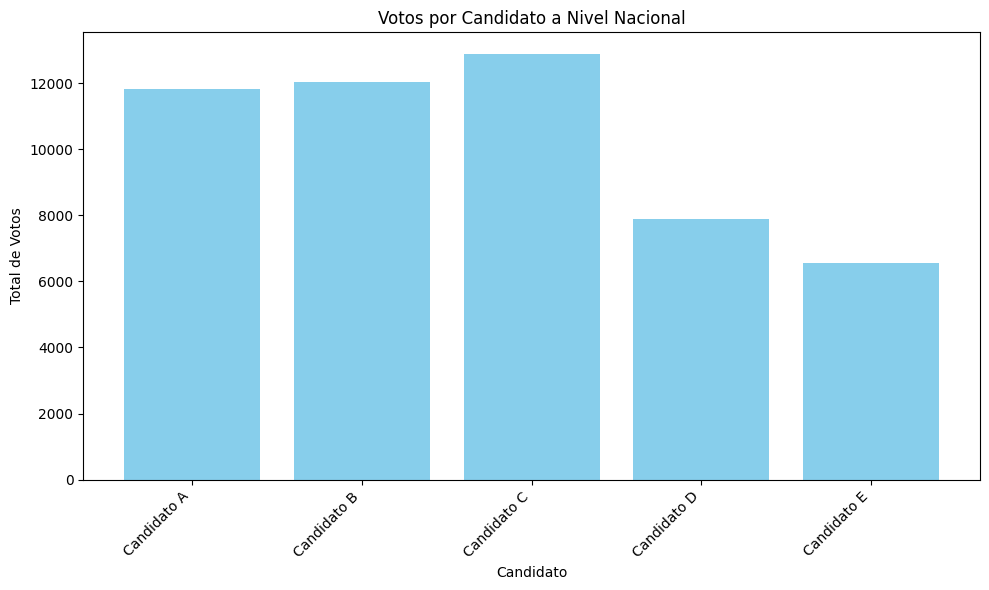

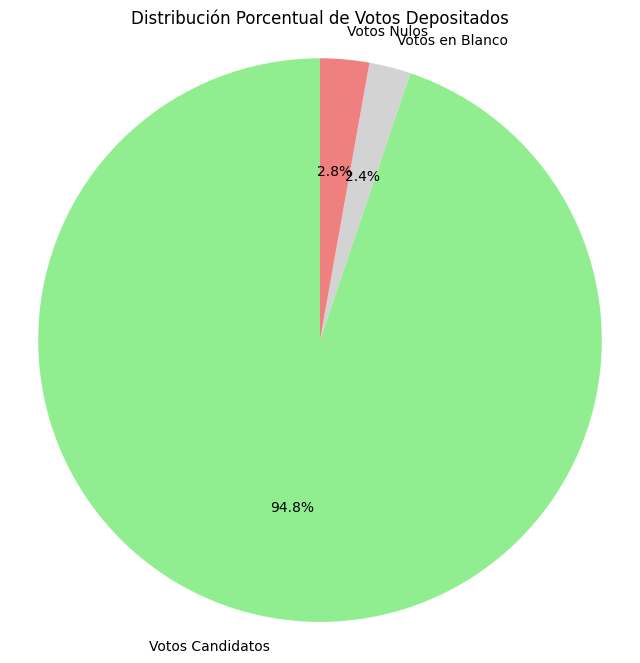

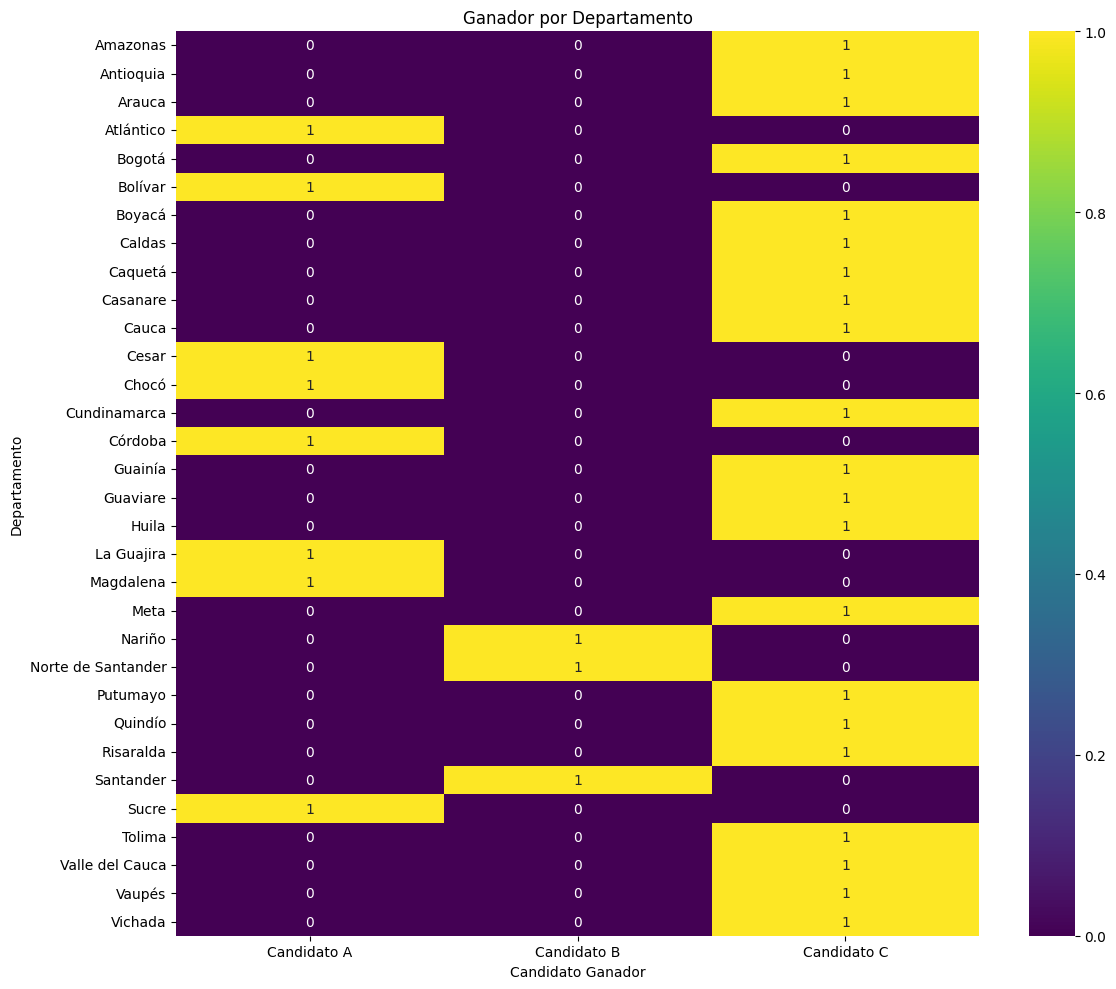

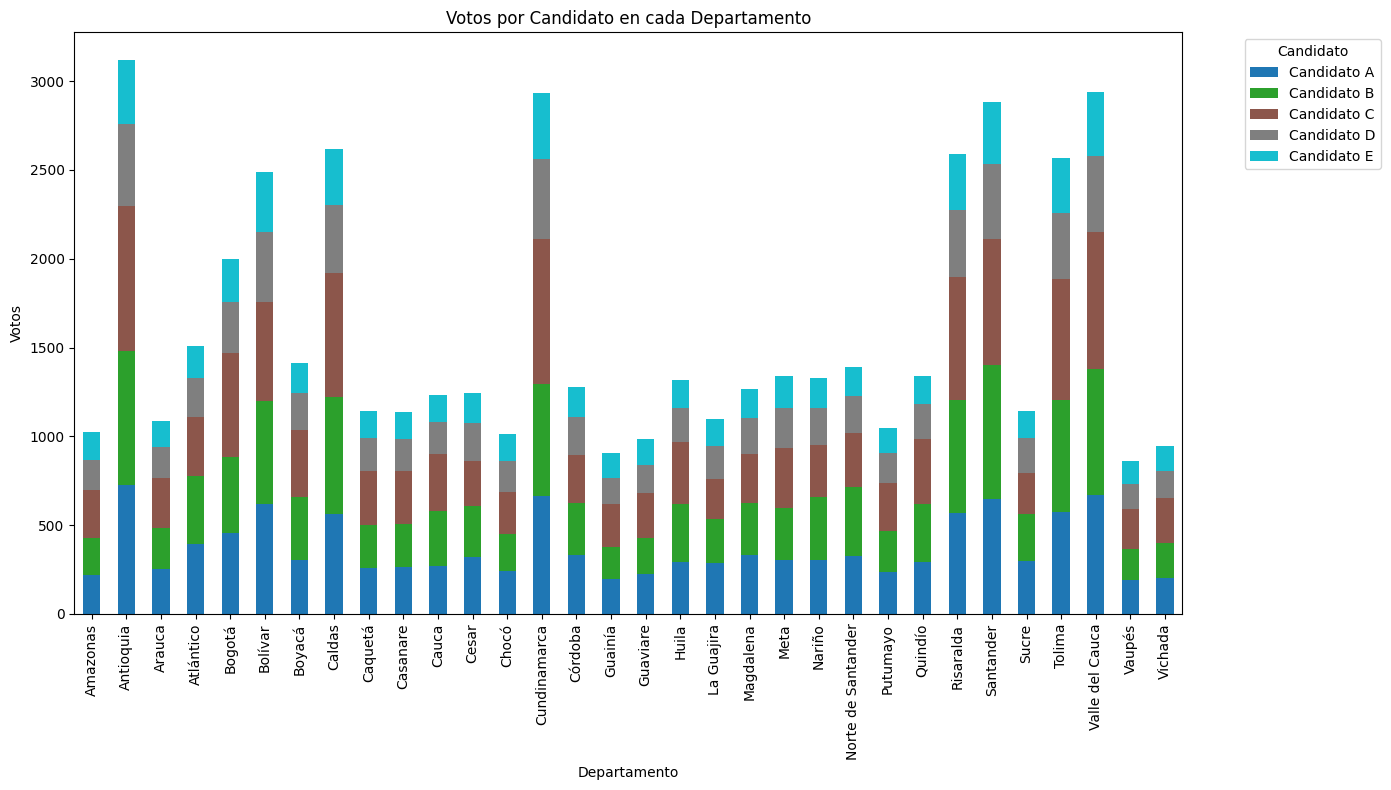

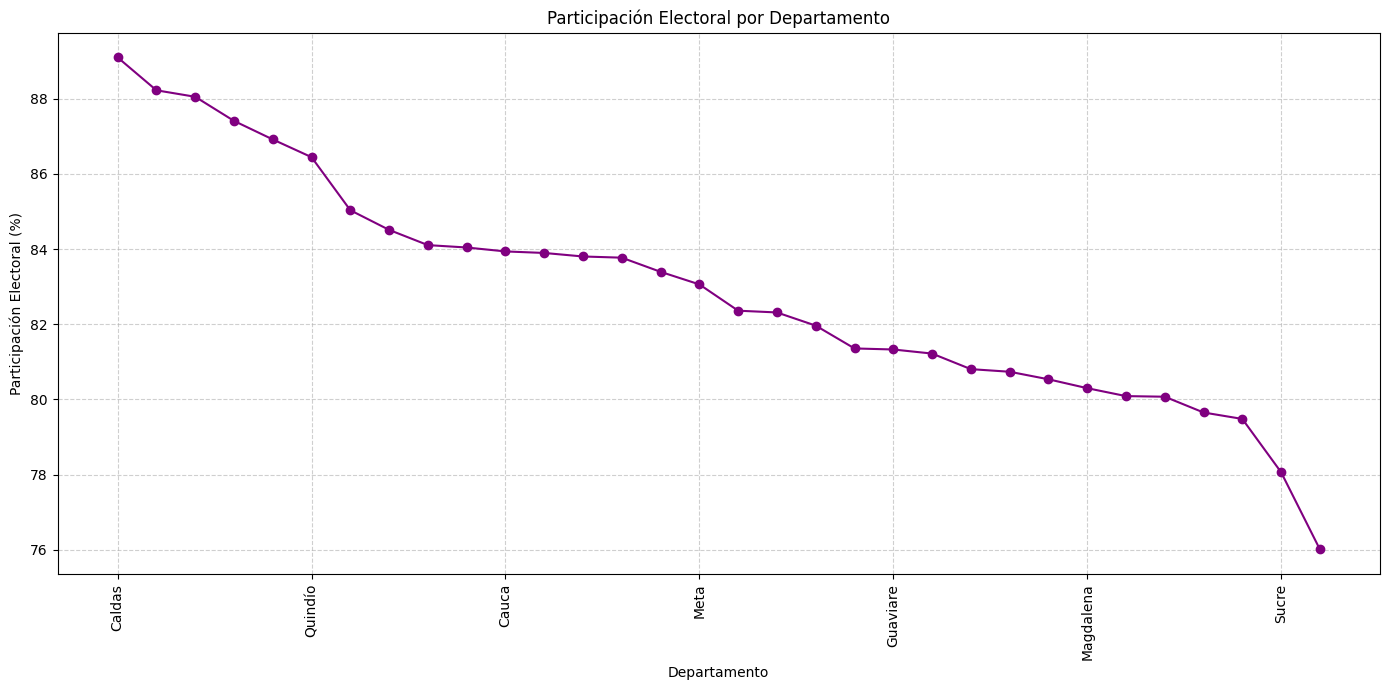

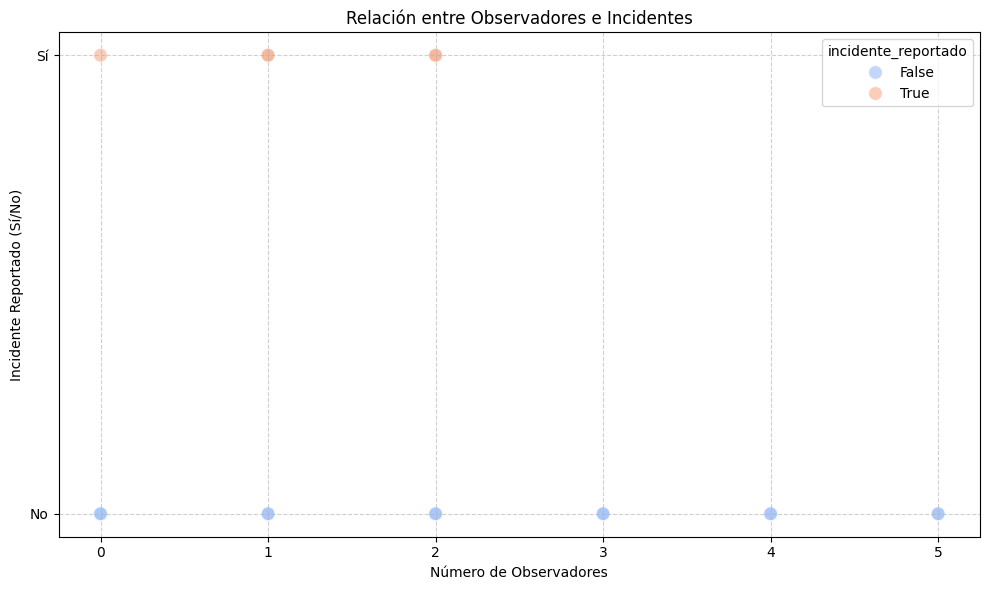

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('elecciones.csv')

# Define candidate columns for reuse
candidate_columns = ['votos_candidato_a', 'votos_candidato_b', 'votos_candidato_c', 'votos_candidato_d', 'votos_candidato_e']

# PARTE 7 - VISUALIZACIONES

# 32. Gráfico de barras: Votos por candidato a nivel nacional
votos_por_candidato = df[candidate_columns].sum()
candidatos = [col.replace('votos_', '').replace('_', ' ').title() for col in candidate_columns] # Renaming for better labels
plt.figure(figsize=(10, 6))
plt.bar(candidatos, votos_por_candidato.values, color='skyblue')
plt.xlabel('Candidato')
plt.ylabel('Total de Votos')
plt.title('Votos por Candidato a Nivel Nacional')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 33. Gráfico circular: Distribución porcentual de votos válidos
# Calculate valid votes by summing all candidate votes
total_votos_validos = df[candidate_columns].sum().sum() # Sum of sums for all candidates
total_votos_mesa_sum = df['total_votos_mesa'].sum()

# Calculate total invalid votes (blanco + nulos)
total_votos_invalidos = df['votos_blanco'].sum() + df['votos_nulos'].sum()

# Recalculate percentages based on total votes cast, including blanco and nulos
# The original problem described 'votos validos' as candidate votes, and the rest as 'no validos'
# This assumes total_votos_mesa includes valid, blank, and null votes

if total_votos_mesa_sum > 0:
    porcentaje_votos_validos = (total_votos_validos / total_votos_mesa_sum) * 100
    porcentaje_votos_blanco = (df['votos_blanco'].sum() / total_votos_mesa_sum) * 100
    porcentaje_votos_nulos = (df['votos_nulos'].sum() / total_votos_mesa_sum) * 100
else:
    porcentaje_votos_validos = 0
    porcentaje_votos_blanco = 0
    porcentaje_votos_nulos = 0

labels = ['Votos Candidatos', 'Votos en Blanco', 'Votos Nulos']
sizes = [porcentaje_votos_validos, porcentaje_votos_blanco, porcentaje_votos_nulos]
colors = ['lightgreen', 'lightgray', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución Porcentual de Votos Depositados')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 34.Mapa de calor: Ganador por departamento
# Ensuring candidate_columns is defined
ganador_por_departamento = df.groupby('departamento')[candidate_columns].sum().idxmax(axis=1)

# Map candidate column names to more readable names for the heatmap
candidate_names_map = {
    'votos_candidato_a': 'Candidato A',
    'votos_candidato_b': 'Candidato B',
    'votos_candidato_c': 'Candidato C',
    'votos_candidato_d': 'Candidato D',
    'votos_candidato_e': 'Candidato E'
}
ganador_por_departamento_readable = ganador_por_departamento.map(candidate_names_map)

# Create a DataFrame where rows are departments and columns are candidates,
# with 1 for the winning candidate and 0 for others.
# pd.get_dummies converts categorical data into dummy/indicator variables.
heatmap_data = pd.get_dummies(ganador_por_departamento_readable)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Candidato Ganador')
plt.ylabel('Departamento')
plt.title('Ganador por Departamento')
plt.tight_layout()
plt.show()

# 35. Gráfico de barras apiladas: Votos por candidato en cada departamento
votos_por_candidato_por_departamento = df.groupby('departamento')[candidate_columns].sum()

# Rename columns for better legend labels
votos_por_candidato_por_departamento.columns = [candidate_names_map[col] for col in votos_por_candidato_por_departamento.columns]

votos_por_candidato_por_departamento.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab10')
plt.xlabel('Departamento')
plt.ylabel('Votos')
plt.title('Votos por Candidato en cada Departamento')
plt.legend(title='Candidato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 36. Gráfico de líneas: Participación electoral por departamento
# Calculate participation rate correctly: total votes in department / potential voters in department
participacion_electoral_por_departamento = (df.groupby('departamento')['total_votos_mesa'].sum() / df.groupby('departamento')['potencial_votantes'].sum()) * 100
participacion_electoral_por_departamento = participacion_electoral_por_departamento.sort_values(ascending=False)

plt.figure(figsize=(14, 7))
participacion_electoral_por_departamento.plot(kind='line', marker='o', color='purple')
plt.xlabel('Departamento')
plt.ylabel('Participación Electoral (%)')
plt.title('Participación Electoral por Departamento')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 37. Gráfico de dispersión: Relación entre observadores e incidentes
# Ensure 'incidente_reportado' column is available
df['incidente_reportado'] = df['incidentes'] == 'Sí'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='observadores', y='incidente_reportado', hue='incidente_reportado', palette='coolwarm', s=100, alpha=0.7)
plt.xlabel('Número de Observadores')
plt.ylabel('Incidente Reportado (Sí/No)')
plt.title('Relación entre Observadores e Incidentes')
plt.yticks([False, True], ['No', 'Sí'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('elecciones.csv')

# Define candidate columns for reuse
candidate_columns = ['votos_candidato_a', 'votos_candidato_b', 'votos_candidato_c', 'votos_candidato_d', 'votos_candidato_e']
candidate_names = ['Candidato A', 'Candidato B', 'Candidato C', 'Candidato D', 'Candidato E']
candidate_names_map = dict(zip(candidate_columns, candidate_names))

# PARTE 8 - ANALISIS COMPARATIVO

# 38. ¿Qué candidato tuvo votación más homogénea entre departamentos?
# 39. ¿Qué candidato tuvo votación más concentrada en pocos departamentos?

# Calculate the percentage of votes for each candidate per department
votes_by_department = df.groupby('departamento')[candidate_columns].sum()
total_votes_by_department = votes_by_department.sum(axis=1)

# Avoid division by zero if a department had no votes
# Replace 0 with 1 for total_votes_by_department to avoid division by zero
total_votes_by_department_safe = total_votes_by_department.replace(0, 1)

percentage_votes_by_department = votes_by_department.divide(total_votes_by_department_safe, axis=0) * 100

# Calculate the standard deviation of percentages for each candidate across departments
std_dev_percentages = percentage_votes_by_department.std()

# Rename columns for better readability
std_dev_percentages_readable = std_dev_percentages.rename(index=candidate_names_map)

candidato_mas_homogeneo = std_dev_percentages_readable.idxmin()
candidato_mas_concentrado = std_dev_percentages_readable.idxmax()

print(f"\nEl candidato con la votación más homogénea entre departamentos es: {candidato_mas_homogeneo} (Desviación Estándar: {std_dev_percentages_readable.min():.2f})")
print(f"El candidato con la votación más concentrada en pocos departamentos es: {candidato_mas_concentrado} (Desviación Estándar: {std_dev_percentages_readable.max():.2f})")


# 40. Calcular el índice de fragmentación electoral (1 - suma de cuadrados de porcentajes)


# calculo del total de votos por cada candidato
total_national_votes = df[candidate_columns].sum()

# calculo de total de votos validos
total_votos_validos_nacional = total_national_votes.sum()

# calculo del porcentaje de votos por cada candidato
porcentaje_nacional_votos = (total_national_votes / total_votos_validos_nacional)

# calculo de la suma de los cuadrados de estos porcentajes
sum_sq_percentages = (porcentaje_nacional_votos ** 2).sum()

# Calcular el indice de fragmentacion electoral
indice_fragmentacion_electoral = 1 - sum_sq_percentages

print(f"\nEl índice de fragmentación electoral nacional es: {indice_fragmentacion_electoral:.4f}")


# 41. ¿Cuál fue el margen de victoria más estrecho en algún departamento?

# Agruar por departamentos y sumas los votos de los candidatos
votes_by_department_candidates = df.groupby('departamento')[candidate_columns].sum()

# inicializar una lista para almacenar margenes de victoria
victory_margins = []

for index, row in votes_by_department_candidates.iterrows():

    # ordenar candidatos por votos en orden descendente para el departamento actual
    sorted_votes = row.sort_values(ascending=False)

    # asegurarse de que haya al menos 2 candidatos para comparar
    if len(sorted_votes) >= 2:
        winner_votes = sorted_votes.iloc[0]
        second_place_votes = sorted_votes.iloc[1]
        margin = winner_votes - second_place_votes
        # añadir (margin, department, winner, second_place) a la lista
        victory_margins.append({'departamento': index, 'margen': margin, 'ganador': sorted_votes.index[0], 'segundo_lugar': sorted_votes.index[1]})

# convertir a dataframe para un analisis mas sencillo
margins_df = pd.DataFrame(victory_margins)

# Encontrar el margen mas estrecho
narrowest_margin_row = margins_df.loc[margins_df['margen'].idxmin()]

print(f"\nEl margen de victoria más estrecho fue en el departamento de {narrowest_margin_row['departamento']} con un margen de {int(narrowest_margin_row['margen']):,} votos.")
print(f"El ganador fue {candidate_names_map[narrowest_margin_row['ganador']]} y el segundo lugar fue {candidate_names_map[narrowest_margin_row['segundo_lugar']]}.")


El candidato con la votación más homogénea entre departamentos es: Candidato D (Desviación Estándar: 0.85)
El candidato con la votación más concentrada en pocos departamentos es: Candidato C (Desviación Estándar: 2.47)

El índice de fragmentación electoral nacional es: 0.7879

El margen de victoria más estrecho fue en el departamento de Chocó con un margen de 6 votos.
El ganador fue Candidato A y el segundo lugar fue Candidato C.


In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('elecciones.csv')
# candidate_columns están definidas

candidate_columns = ['votos_candidato_a', 'votos_candidato_b', 'votos_candidato_c', 'votos_candidato_d', 'votos_candidato_e']
candidate_names = ['Candidato A', 'Candidato B', 'Candidato C', 'Candidato D', 'Candidato E']

# Volver a calcular candidate_votes y votos_por_candidato para asegurar que están actualizados
candidate_votes = {}
for col, name in zip(candidate_columns, candidate_names):
    candidate_votes[name] = df[col].sum()
votos_por_candidato = pd.Series(candidate_votes)

# Volver a calcular porcentaje_votos
total_votos_validos = votos_por_candidato.sum()
porcentaje_votos = (votos_por_candidato / total_votos_validos) * 100

# 42. Si se requiere segunda vuelta (ningún candidato > 50%), ¿quiénes pasarían?

# 1. Revisar la variable `porcentaje_votos` para determinar si algún candidato obtuvo más del 50% del voto nacional.
winner_found = False
for candidate, percentage in porcentaje_votos.items():
    if percentage > 50:
        print(f"\nNo se requiere segunda vuelta. El {candidate} ganó con el {percentage:.2f}% de los votos.")
        winner_found = True
        break

# 2. Si ningún candidato alcanzó el umbral del 50%, identificar a los dos principales candidatos que avanzarían a una potencial segunda vuelta.
# 3. Imprimir si se necesita una segunda vuelta y, de ser así, nombrar a los dos candidatos que competirían en ella.
if not winner_found:
    top_two_candidates = votos_por_candidato.nlargest(2)
    first_place_candidate = top_two_candidates.index[0]
    second_place_candidate = top_two_candidates.index[1]

    print(f"\nSe requiere una segunda vuelta. Los candidatos que pasarían son: {first_place_candidate} y {second_place_candidate}.")
    print(f"{first_place_candidate}: {porcentaje_votos[first_place_candidate]:.2f}% de los votos.")
    print(f"{second_place_candidate}: {porcentaje_votos[second_place_candidate]:.2f}% de los votos.")


# 45. ¿Qué candidato creció/decreció comparado con encuestas (asumir: A:28%, B:25%, C:22%, D:15%, E:10%)?

# Definir porcentajes de encuestas pre-electorales asumidos
poll_percentages = {
    'Candidato A': 28,
    'Candidato B': 25,
    'Candidato C': 22,
    'Candidato D': 15,
    'Candidato E': 10
}

print("\nComparación de resultados con encuestas pre-electorales:")
for candidate, actual_percentage in porcentaje_votos.items():
    if candidate in poll_percentages:
        poll_val = poll_percentages[candidate]
        difference = actual_percentage - poll_val
        if difference > 0:
            print(f"{candidate}: Creció {difference:.2f}% (Encuesta: {poll_val:.2f}%, Real: {actual_percentage:.2f}%)")
        elif difference < 0:
            print(f"{candidate}: Decreció {-difference:.2f}% (Encuesta: {poll_val:.2f}%, Real: {actual_percentage:.2f}%)")
        else:
            print(f"{candidate}: Se mantuvo igual (Encuesta: {poll_val:.2f}%, Real: {actual_percentage:.2f}%)")

# 46. Elaborar 5 conclusiones políticas basadas en los datos
# Este es un análisis cualitativo que no puede calcularse directamente a partir de los datos.


Se requiere una segunda vuelta. Los candidatos que pasarían son: Candidato C y Candidato B.
Candidato C: 25.19% de los votos.
Candidato B: 23.52% de los votos.

Comparación de resultados con encuestas pre-electorales:
Candidato A: Decreció 4.93% (Encuesta: 28.00%, Real: 23.07%)
Candidato B: Decreció 1.48% (Encuesta: 25.00%, Real: 23.52%)
Candidato C: Creció 3.19% (Encuesta: 22.00%, Real: 25.19%)
Candidato D: Creció 0.40% (Encuesta: 15.00%, Real: 15.40%)
Candidato E: Creció 2.83% (Encuesta: 10.00%, Real: 12.83%)



Preguntas y Respuestas
¿Se necesita una segunda vuelta? Si es así, ¿quiénes pasarían? Sí, se necesita una segunda vuelta porque ningún candidato superó el 50% del voto nacional. El Candidato C y el Candidato B pasarían a la segunda vuelta.

¿Qué alianzas estratégicas serían necesarias para la segunda vuelta? Para el Candidato C, las alianzas estratégicas podrían implicar buscar el apoyo de los votantes del Candidato D (15.40%), Candidato E (12.83%) o Candidato A (23.07%). Para el Candidato B, las alianzas podrían implicar buscar el apoyo de los votantes del Candidato A (23.07%), Candidato D (15.40%) y Candidato E (12.83%).

¿Qué tres departamentos clave influyeron en la elección? Se identificaron tres departamentos clave:

Antioquia: Peso electoral significativo y campo de batalla crucial.

Bogotá: Principal centro urbano con un gran electorado, donde el Candidato C ganó con un margen considerable.

Bolívar (o Atlántico/Cesar/La Guajira): Representando los fortines regionales del Candidato A. También podrían considerarse clave departamentos con márgenes de victoria muy estrechos, como Chocó.

¿Qué candidato creció/decreció en comparación con los resultados hipotéticos de encuestas (A:28%, B:25%, C:22%, D:15%, E:10%)?

El Candidato C creció un 3.19% (real: 25.19%, encuesta: 22%).

El Candidato D creció un 0.40% (real: 15.40%, encuesta: 15%).

El Candidato E creció un 2.83% (real: 12.83%, encuesta: 10%).

El Candidato A decreció un 4.93% (real: 23.07%, encuesta: 28%).

El Candidato B decreció un 1.48% (real: 23.52%, encuesta: 25%).

¿Cuáles son cinco conclusiones políticas basadas en el análisis?

Necesidad de Coaliciones para Segunda Vuelta: La fragmentación del voto exige alianzas políticas para que el Candidato C y B aseguren la victoria.

Ascenso de Candidatos Nuevos/Menos Esperados: El crecimiento del Candidato C y E en comparación con las encuestas sugiere dinámicas de votación tardía o imprecisiones en las encuestas.

Impacto de la Abstención y Votos Inválidos: El 16.42% de abstención y más del 5% de votos inválidos/en blanco representan un segmento significativo cuyo apoyo podría ser decisivo en una segunda vuelta.

Dispersión del Voto y Fragmentación Electoral: Un índice de fragmentación electoral nacional de 0.7879 indica una alta dispersión del voto, lo que dificulta lograr mayorías absolutas en la primera vuelta.

Correlación entre Observadores y Menos Incidentes: Las zonas con más observadores mostraron un menor porcentaje de incidentes (4.40%) en comparación con aquellas con menos observadores (9.17%), destacando la importancia del monitoreo electoral para la transparencia.

Hallazgos Clave del Análisis de Datos
Ningún candidato obtuvo más del 50% del voto nacional, lo que obliga a una segunda vuelta.

El Candidato C lidera con un 25.19% de los votos, seguido de cerca por el Candidato B con un 23.52%. Estos dos candidatos avanzarán a la segunda vuelta.

El Candidato C superó significativamente las expectativas de las encuestas hipotéticas, creciendo un 3.19%. El Candidato E también mostró un fuerte crecimiento, aumentando un 2.83%, y el Candidato D un 0.40%.

El Candidato A y el Candidato B experimentaron una disminución en sus porcentajes de voto reales en comparación con las predicciones de las encuestas hipotéticas, específicamente una caída del 4.93% para el Candidato A y del 1.48% para el Candidato B.

El alto índice de fragmentación electoral de 0.7879 subraya el desafío de lograr una mayoría en la primera vuelta.

Conclusiones o Próximos Pasos
El desempeño del Candidato C y E, desafiando las encuestas preelectorales, sugiere un posible cambio en el sentimiento del votante cerca del día de la elección o una mala representación en los datos de la encuesta hipotética. Los análisis futuros deberían investigar los factores que contribuyen a estas discrepancias.

Para la próxima segunda vuelta, los candidatos deberán cortejar estratégicamente a los votantes del Candidato A (23.07%), Candidato D (15.40%) y Candidato E (12.83%), cuya cuota de voto combinada representa más del 51% del total, lo que hace que las alianzas sean críticas para la victoria.
